In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [14]:
bikedf=pd.read_csv('C:/Users/Acer/12JAN-18JAN2025-GENAI/DATASETS/bike-sharing/hour.csv')

In [15]:
numcols=bikedf[['temp','atemp','hum','windspeed','casual','registered','cnt']]
objcols=bikedf[['season','yr','mnth','hr','holiday','weekday','workingday','weathersit']]

objcols.head(3)

,season,yr,mnth,hr,holiday,weekday,workingday,weathersit
0,1,0,1,0,0,6,0,1
1,1,0,1,1,0,6,0,1
2,1,0,1,2,0,6,0,1


In [16]:
#Dependent variables ( Y ) is cnt  ( Total Count of Bicycles Rented )
#
#Goal : 

# Prepare a  model to predict CNT using all other variables as Independent variables
# CNT is numerical and conitinous, REgression model to built

#check for multicollinearity in numcols
#Distribution of CNT

#Multicollinearity in data science refers to a situation where two or more independent
#variables in a regression model are highly correlated with each other. This can make it difficult to 
#determine the individual effect of each predictor on the dependent variable, leading to unreliable coefficient estimates and inflated standard errors.
#Multicollinearity can reduce the model's interpretability and predictive accuracy.


# problem of cardinaltiy
#cardinality levels - acceptable range is 50 levels

#Cardinality refers to the number of unique values in a categorical variable. High
#cardinality means the categorical feature has many unique values, which can pose challenges in data analysis and machine learning

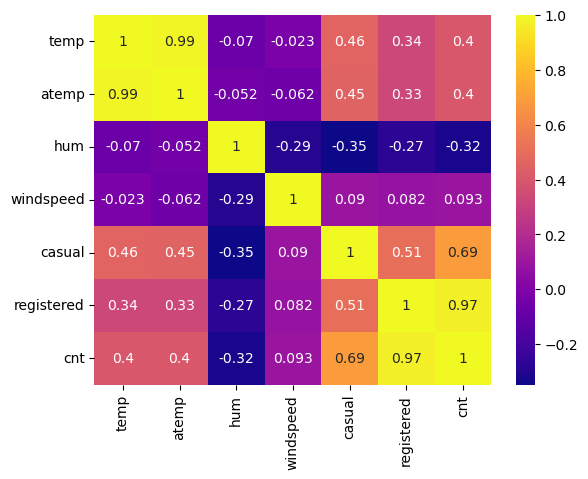

In [17]:
#check for multicollinearity in numcols - Correlation analysis
import seaborn as sns

sns.heatmap(numcols.corr(),annot=True,cmap="plasma")
plt.show()

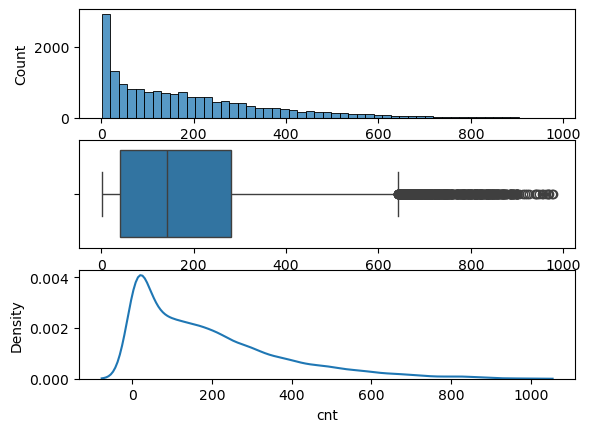

In [18]:
fig,ax=plt.subplots(3,1)
sns.histplot(numcols['cnt'],ax=ax[0]) #represents Y axis
sns.boxplot(numcols['cnt'],ax=ax[1],orient="h")
sns.kdeplot(numcols['cnt'],ax=ax[2])
plt.show()

In [19]:
# Dummy Encode objcols

objcols_dummy=pd.get_dummies(objcols,columns=['season','yr','mnth','hr','holiday','weekday','workingday','weathersit'])


In [20]:

objcols_dummy.head(3)

,season_1,season_2,season_3,season_4,yr_0,yr_1,mnth_1,mnth_2,mnth_3,mnth_4,...,weekday_3,weekday_4,weekday_5,weekday_6,workingday_0,workingday_1,weathersit_1,weathersit_2,weathersit_3,weathersit_4
0,True,False,False,False,True,False,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
1,True,False,False,False,True,False,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False
2,True,False,False,False,True,False,True,False,False,False,...,False,False,False,True,True,False,True,False,False,False


In [24]:
bikedf_final=pd.concat([numcols,objcols_dummy],axis=1)

y=bikedf_final.cnt
X=bikedf_final.drop('cnt',axis=1)


In [27]:
from sklearn.linear_model import LinearRegression

In [28]:
regmodel=LinearRegression().fit(X,y)
regmodel.score(X,y)

1.0

In [34]:
X_new=X.drop(['atemp','registered'],axis=1)
regmodel_new=LinearRegression().fit(X_new,y)

In [35]:
regmodel_new.score(X_new,y)

0.8106137757618999

In [36]:
regmodel_new_pred=regmodel_new.predict(X_new)

In [37]:
from sklearn.metrics import root_mean_squared_error

In [38]:
root_mean_squared_error(y,regmodel_new_pred)

78.9349412459004

In [39]:
#Build model with Log transformation of y for positive skewness

regmodel_log= LinearRegression().fit(X_new,np.log(y))

regmodel_log.score(X_new,np.log(y))

regmodel_log_pred=regmodel_log.predict(X_new)